In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak
from tqdm import tqdm
import pandas as pd
from scipy import stats
import mpl_scatter_density
import os

In [2]:
IFT = uproot.open("../FASER-Track-Matching/IFT/trackerspfit.root")
x = np.array(IFT["spfit"]["sp_track_x"])
y = np.array(IFT["spfit"]["sp_track_y"])
z = np.array(IFT["spfit"]["sp_track_z"])
p1 = np.array(IFT["spfit"]["track_p1"])  # tx
p3 = np.array(IFT["spfit"]["track_p3"])  # ty

x_space_points = x[len(x[:])!=0]
y_space_points = y[len(y[:])!=0]
z_space_points = z[len(z[:])!=0]
p1_tx = p1[len(p1[:])!=0]
p3_ty = p3[len(p3[:])!=0]


x_FIRST = []

for i in range(0,len(x_space_points[0])):
    if len(x_space_points[:,i][0]) == 3:
        x_FIRST.append(x_space_points[:,i][0][0])

y_FIRST = []

for i in range(0,len(y_space_points[0])):
    if len(y_space_points[:,i][0]) == 3:
        y_FIRST.append(y_space_points[:,i][0][0])
        
z_FIRST = []

for i in range(0,len(z_space_points[0])):
    if len(z_space_points[:,i][0]) == 3:
        z_FIRST.append(z_space_points[:,i][0][0])
        
tx_FIRST = []

for i in range(0,len(p1_tx[0])):
    if len(p1_tx[:,i][0]) == 3:
        tx_FIRST.append(p1_tx[:,i][0][0])
        
ty_FIRST = []

for i in range(0,len(p3_ty[0])):
    if len(p3_ty[:,i][0]) == 3:
        ty_FIRST.append(p3_ty[:,i][0][0])


In [3]:
dict = {"x":x_FIRST, "y":y_FIRST, "z":z_FIRST, "tx":tx_FIRST, "ty":ty_FIRST}
mini_IFT = pd.DataFrame(dict)

In [4]:
filter_ymax = mini_IFT[abs(mini_IFT["ty"]) > 0.01]

IFT_pheri = filter_ymax



In [5]:
np.std(mini_IFT['x'])

71.4653519947676

Emulsion Data

In [6]:
# pre-process using PANDAS
area1_1 = pd.read_csv("Emulsion Data/chk_trks_area1-1_20220203.txt", sep='\s+', header=None)
area1_2 = pd.read_csv("Emulsion Data/chk_trks_area1-2_20220203.txt", sep='\s+', header=None)
area1_3 = pd.read_csv("Emulsion Data/chk_trks_area1-3_20220203.txt", sep='\s+', header=None)
area1_4 = pd.read_csv("Emulsion Data/chk_trks_area1-4_20220203.txt", sep='\s+', header=None)

combine = area1_1.append(area1_2, ignore_index=True)
combine = combine.append(area1_3, ignore_index=True)

emulsion = combine.append(area1_4, ignore_index=True)
emulsion.columns = ["t->ID", "plate_first", "plate_last", "x_last", "y_last", "z_last", 
                    "tx_last", "ty_last", "tx_pos", "ty_pos", "t->N()", "t->Npl()"]
emulsion_20 = emulsion[emulsion["plate_last"] == 20]

### Focus on peripheral tracks where the density is lower. Taking tracks with abs(tx), abs(ty) > 0.2 mrad

In [7]:
#filter1 = emulsion_20[abs(emulsion_20["tx_last"]) > 0.1]
#filter_xmax = emulsion_20[abs(emulsion_20["tx_last"]) > 0.1]

filter2 = emulsion_20[abs(emulsion_20["ty_last"]) > 0.01]
#filter_ymax = emulsion_20[abs(emulsion_20["ty_last"]) > 0.1]

#combine = filter1.append(filter2, ignore_index=True)
#combine = combine.append(filter_ymax, ignore_index=True)
#combine = combine.append(filter_ymin, ignore_index=True)

emulsion_pheri = filter2

In [8]:
xmin = 0
xmax = 40000
ymin = 0
ymax = 30000

emulsion_pheri_2x2 = emulsion_pheri.loc[(emulsion_pheri["x_last"] >= xmin)]
emulsion_pheri_2x2 = emulsion_pheri_2x2.loc[(emulsion_pheri_2x2["x_last"] < xmax)]
emulsion_pheri_2x2 = emulsion_pheri_2x2.loc[(emulsion_pheri_2x2["y_last"] >= ymin)]
emulsion_pheri_2x2 = emulsion_pheri_2x2.loc[(emulsion_pheri_2x2["y_last"] < ymax)]

Text(0, 0.5, 'y')

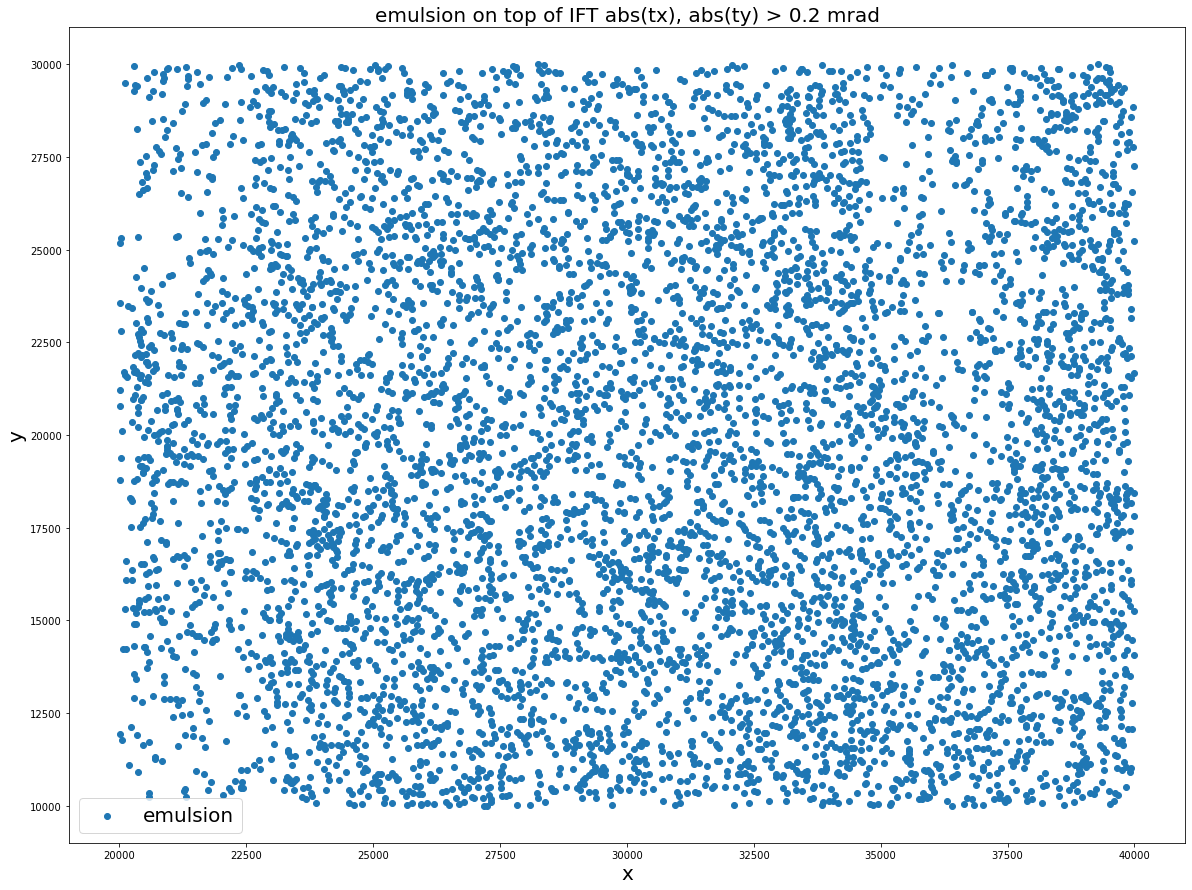

In [9]:
fig = plt.figure(figsize=(20,15))

plt.scatter(emulsion_pheri_2x2['x_last'], emulsion_pheri_2x2['y_last'], label="emulsion")
#plt.scatter(ift_small.iloc[:,0],ift_small.iloc[:,1],marker="o",s=150)
#plt.scatter(ift_small.iloc[:,0],ift_small.iloc[:,1])
#plt.title("x, y dist. (TEST)", size=20)
#plt.scatter(IFT_pheri.iloc[:,0],IFT_pheri.iloc[:,1],label="IFT")
plt.title("emulsion on top of IFT abs(tx), abs(ty) > 0.2 mrad", size=20)
plt.legend(fontsize=20)
plt.xlabel("x",size=20)
plt.ylabel("y",size=20)

In [10]:
x_emul = emulsion_pheri_2x2['x_last'].to_numpy()*(1/1000)
y_emul = emulsion_pheri_2x2['y_last'].to_numpy()*(1/1000)

Text(0, 0.5, 'y')

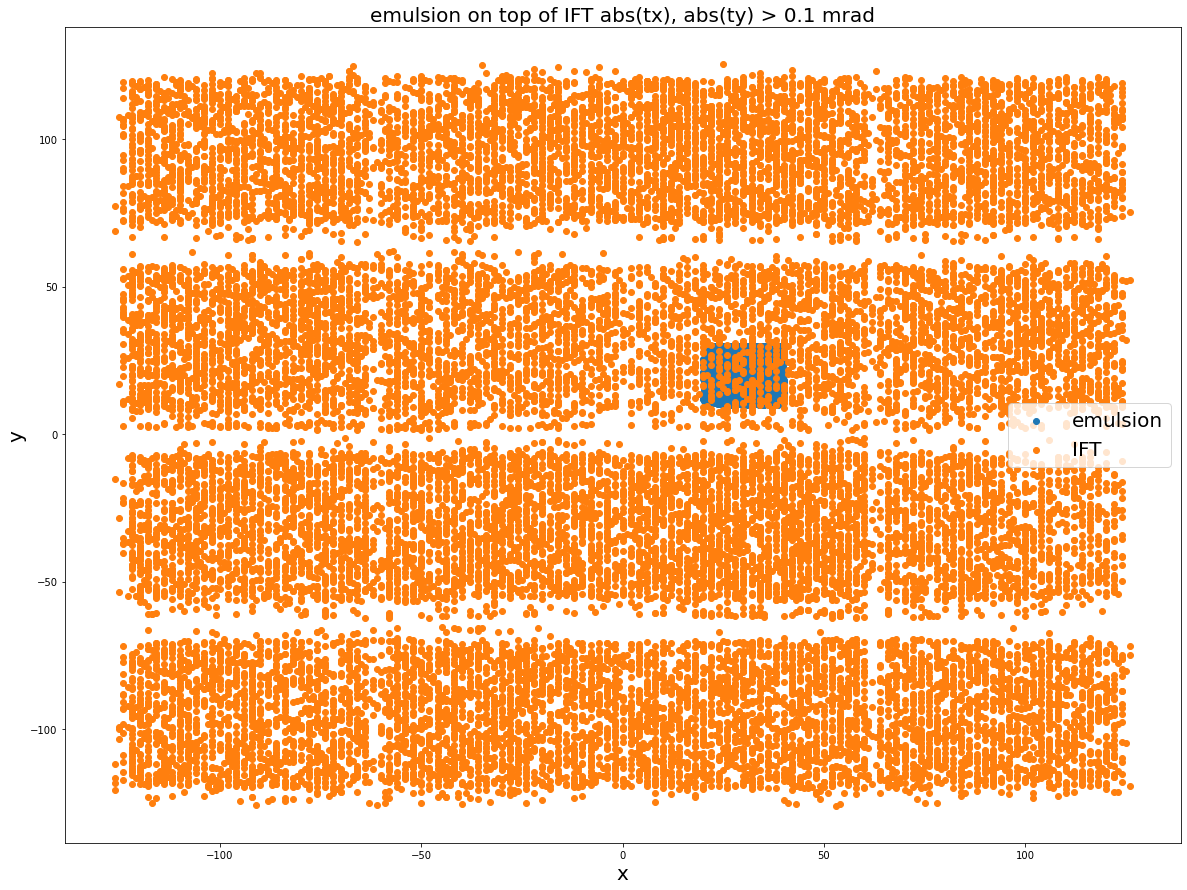

In [11]:
fig = plt.figure(figsize=(20,15))

plt.scatter(x_emul, y_emul, label="emulsion")
#plt.scatter(ift_small.iloc[:,0],ift_small.iloc[:,1],marker="o",s=150)
#plt.scatter(ift_small.iloc[:,0],ift_small.iloc[:,1])
#plt.title("x, y dist. (TEST)", size=20)
plt.scatter(IFT_pheri.iloc[:,0],IFT_pheri.iloc[:,1],label="IFT")
plt.title("emulsion on top of IFT abs(tx), abs(ty) > 0.1 mrad", size=20)
plt.legend(fontsize=20)
plt.xlabel("x",size=20)
plt.ylabel("y",size=20)

In [12]:
#xmin = 30
#xmax = 50
#ymin = 30
#ymax = 50

#ift_small = IFT_pheri.loc[(IFT_pheri["x"] >= xmin)]
#ift_small = ift_small.loc[(ift_small["x"] < xmax)]
#ift_small = ift_small.loc[(ift_small["y"] >= ymin)]
#ift_small = ift_small.loc[(ift_small["y"] < ymax)]


In [13]:
#fig = plt.figure(figsize=(20,15))

#plt.scatter(IFT_pheri.iloc[:,0],IFT_pheri.iloc[:,1])
#plt.scatter(ift_small.iloc[:,0],ift_small.iloc[:,1],marker="o",s=150)
#plt.scatter(ift_small.iloc[:,0],ift_small.iloc[:,1])
#plt.title("x, y dist. (TEST)", size=20)
#plt.title("x, y dist. (first space point only)", size=20)
#plt.xlabel("x",size=20)
#plt.ylabel("y",size=20)

In [14]:
x_full = IFT_pheri['x'].to_numpy()
y_full = IFT_pheri['y'].to_numpy()

In [15]:
print(len(x_full), len(x_emul))

25594 6767


In [16]:
np.std(x_full)

70.7589622579004

In [17]:
var_y_ift = np.var(y_full)
var_y_ift

5320.554512881478

In [18]:
#x_small = ift_small['x'].to_numpy()
#y_small = ift_small['y'].to_numpy()

In [19]:
dx, dy = np.linspace(-125, 85, 20), np.linspace(-125, 85, 20)

In [20]:
#dx2, dy2 = np.linspace(-100, 50, 4), np.linspace(-100, 50, 4)

In [21]:
len(x_full)

25594

In [22]:
x_full

array([  13.99679947, -117.00366974,   29.99786568, ...,  -13.99679947,
         78.00106812,  -92.0019989 ])

In [23]:
y_full

array([  54.95461655,  106.27213287,  -31.99002457, ...,  -43.99242401,
       -117.97447205,  -90.16891479])

In [24]:
total_chi2 = np.zeros([len(dx), len(dy)])
for i in tqdm(range(len(dx))):
    testiftx1 = x_emul + dx[i] 
    for j in range(len(dy)):
        testifty1 = y_emul + dy[j]
        #print(testifty1)
        #print('--------------')
        #print(testiftx1)

        test_chi2 = []
        for k in range(len(testiftx1)):
            test_chi2.append(np.min(((y_full - testifty1[k])**2)/var_y_ift))
        total_chi2[i, j] = np.sum(test_chi2)
    

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:42<00:00,  5.12s/it]


In [25]:
data = pd.DataFrame(total_chi2, columns=dx, index=dy)

In [26]:
data

-125.000000  -113.947368  -102.894737  -91.842105   -80.789474   \
-125.000000     0.000106      0.00011     0.000109     0.144792     0.187935   
-113.947368     0.000106      0.00011     0.000109     0.144792     0.187935   
-102.894737     0.000106      0.00011     0.000109     0.144792     0.187935   
-91.842105      0.000106      0.00011     0.000109     0.144792     0.187935   
-80.789474      0.000106      0.00011     0.000109     0.144792     0.187935   
-69.736842      0.000106      0.00011     0.000109     0.144792     0.187935   
-58.684211      0.000106      0.00011     0.000109     0.144792     0.187935   
-47.631579      0.000106      0.00011     0.000109     0.144792     0.187935   
-36.578947      0.000106      0.00011     0.000109     0.144792     0.187935   
-25.526316      0.000106      0.00011     0.000109     0.144792     0.187935   
-14.473684      0.000106      0.00011     0.000109     0.144792     0.187935   
-3.421053       0.000106      0.00011     0.000109     0.144792     0.187935   
 7.631579       0.000106      0.00011     0.000109     0.144792     0.187935   
 18.684211      0.000106      0.00011     0.000109     0.144792     0.187935   
 29.736842      0.000106      0.00011     0.000109     0.144792     0.187935   
 40.789474      0.000106      0.00011     0.000109     0.144792     0.187935   
 51.842105      0.000106      0.00011     0.000109     0.144792     0.187935   
 62.894737      0.000106      0.00011     0.000109     0.144792     0.187935   
 73.947368      0.000106      0.00011     0.000109     0.144792     0.187935   
 85.000000      0.000106      0.00011     0.000109     0.144792     0.187935   

             -69.736842   -58.684211   -47.631579   -36.578947   -25.526316   \
-125.000000     0.000367     0.000113     0.000118     0.000135     0.103085   
-113.947368     0.000367     0.000113     0.000118     0.000135     0.103085   
-102.894737     0.000367     0.000113     0.000118     0.000135     0.103085   
-91.842105      0.000367     0.000113     0.000118     0.000135     0.103085   
-80.789474      0.000367     0.000113     0.000118     0.000135     0.103085   
-69.736842      0.000367     0.000113     0.000118     0.000135     0.103085   
-58.684211      0.000367     0.000113     0.000118     0.000135     0.103085   
-47.631579      0.000367     0.000113     0.000118     0.000135     0.103085   
-36.578947      0.000367     0.000113     0.000118     0.000135     0.103085   
-25.526316      0.000367     0.000113     0.000118     0.000135     0.103085   
-14.473684      0.000367     0.000113     0.000118     0.000135     0.103085   
-3.421053       0.000367     0.000113     0.000118     0.000135     0.103085   
 7.631579       0.000367     0.000113     0.000118     0.000135     0.103085   
 18.684211      0.000367     0.000113     0.000118     0.000135     0.103085   
 29.736842      0.000367     0.000113     0.000118     0.000135     0.103085   
 40.789474      0.000367     0.000113     0.000118     0.000135     0.103085   
 51.842105      0.000367     0.000113     0.000118     0.000135     0.103085   
 62.894737      0.000367     0.000113     0.000118     0.000135     0.103085   
 73.947368      0.000367     0.000113     0.000118     0.000135     0.103085   
 85.000000      0.000367     0.000113     0.000118     0.000135     0.103085   

             -14.473684   -3.421053     7.631579     18.684211    29.736842   \
-125.000000     0.118127     0.000118      0.00012     0.000108     0.000239   
-113.947368     0.118127     0.000118      0.00012     0.000108     0.000239   
-102.894737     0.118127     0.000118      0.00012     0.000108     0.000239   
-91.842105      0.118127     0.000118      0.00012     0.000108     0.000239   
-80.789474      0.118127     0.000118      0.00012     0.000108     0.000239   
-69.736842      0.118127     0.000118      0.00012     0.000108     0.000239   
-58.684211      0.118127     0.000118      0.00012     0.000108     0.000239   
-47.631579 

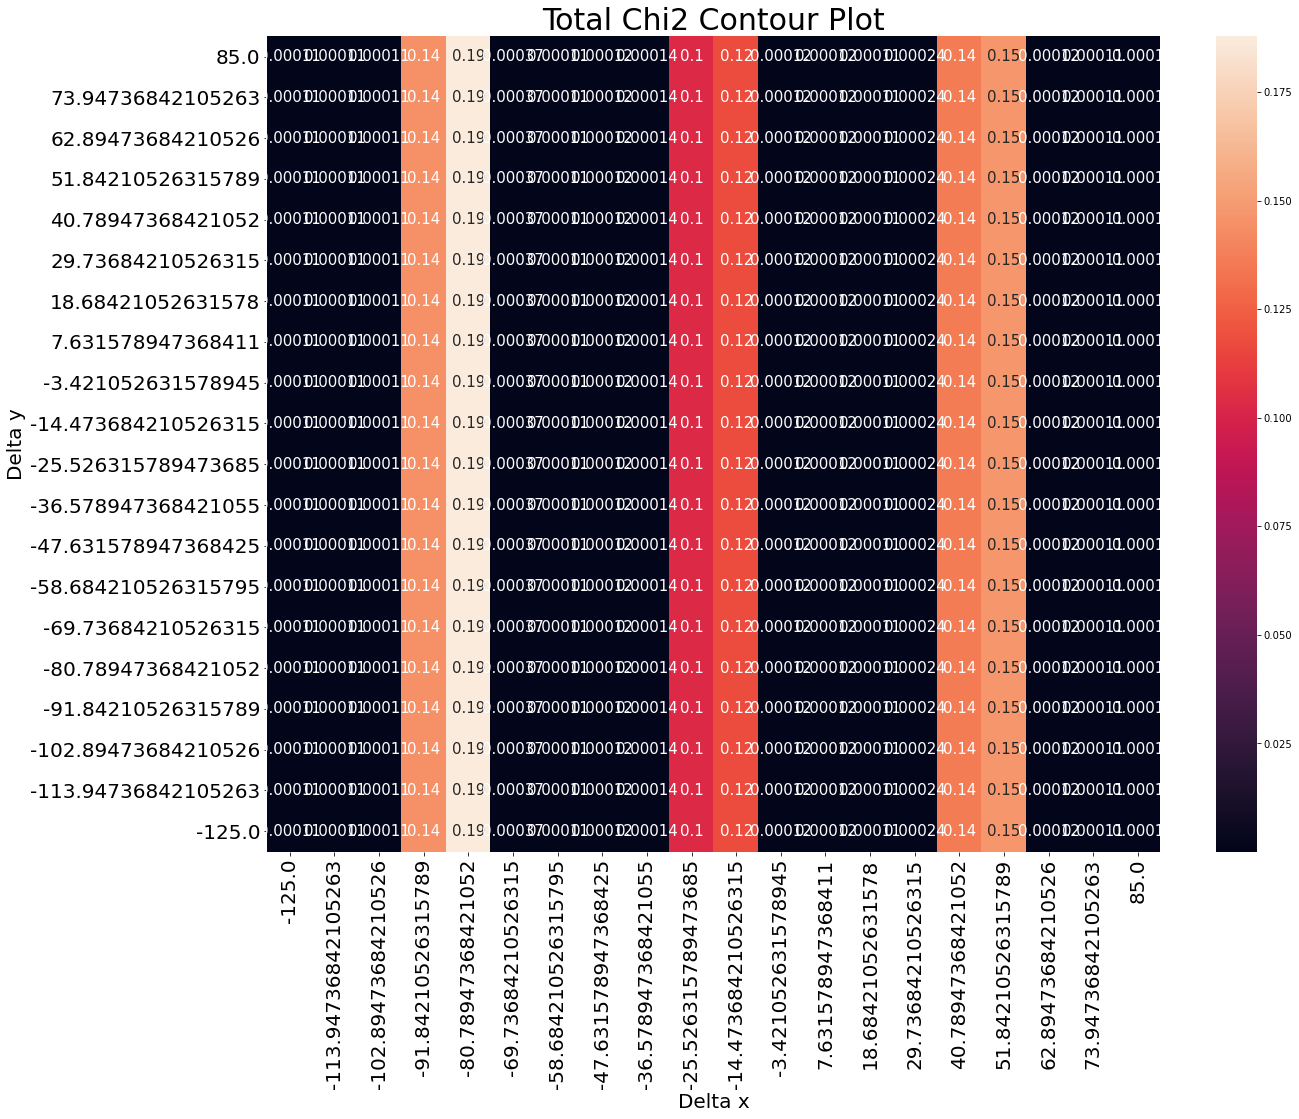

In [86]:
import seaborn as sns
#dx = [-.25, -.2, -.15, -.1, -.05, 0, .05, .1, .15, .2, .25]
#dy = dx
plt.figure(figsize=(20, 15))

ax = sns.heatmap(data, annot=True, annot_kws={"size": 15})
ax.invert_yaxis()
ax.set_xlabel(r'Delta x', fontsize=20)
ax.set_ylabel(r'Delta y', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.set_title('Total Chi2 Contour Plot', fontsize=30)
file_name = 'contor.png'
plt.savefig(file_name,bbox_inches='tight',facecolor='w')

In [87]:
total_chi2 = np.zeros([len(dx), len(dy)])
for i in range(len(dx)):
    testiftx1 = x_emul + dx[i] 
    for j in tqdm(range(len(dy))):
        testifty1 = y_emul + dy[j]
        #print(testifty1)
        #print('--------------')
        #print(testiftx1)

        test_chi2 = []
        for k in range(len(testiftx1)):
            #test_chi2.append(np.min(((y_full - testifty1[k])**2)/var_y_ift)+((x_full-testiftx1[k])**2)/np.var(x_full))
            test_chi2.append(np.min(((y_full - testifty1[k])**2)/var_y_ift+((x_full-testiftx1[k])**2)/np.var(x_full)))
        total_chi2[i, j] = np.sum(test_chi2)
    

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:45<00:00,  2.26s/it]


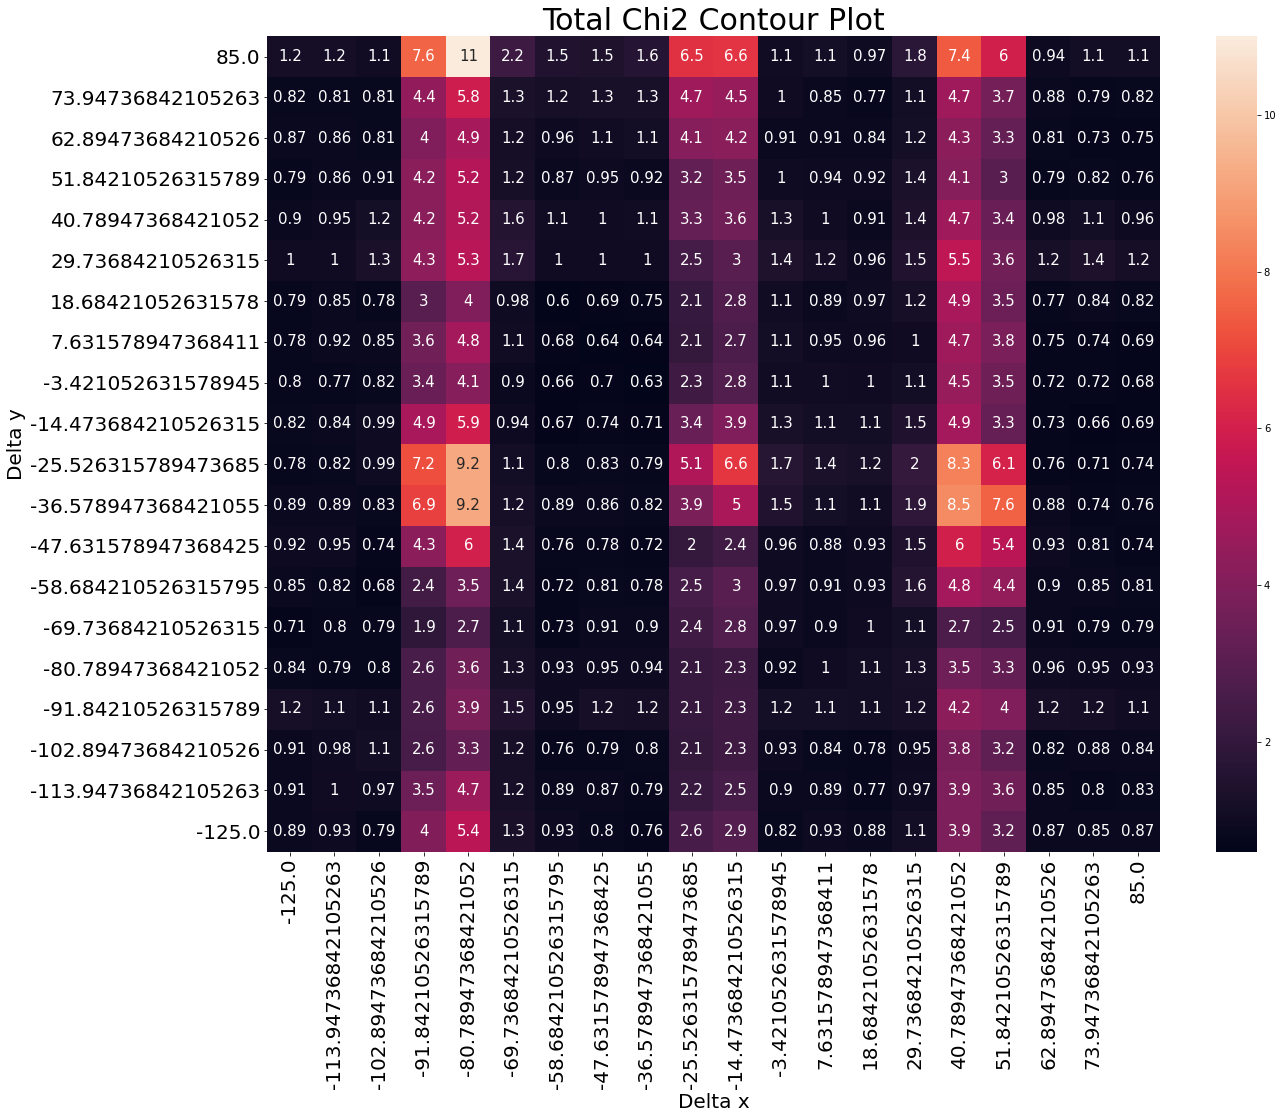

In [88]:
import seaborn as sns
#dx = [-.25, -.2, -.15, -.1, -.05, 0, .05, .1, .15, .2, .25]
#dy = dx
plt.figure(figsize=(20, 15))
data = pd.DataFrame(total_chi2, columns=dx, index=dy)
ax = sns.heatmap(data, annot=True, annot_kws={"size": 15})
ax.invert_yaxis()
ax.set_xlabel(r'Delta x', fontsize=20)
ax.set_ylabel(r'Delta y', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.set_title('Total Chi2 Contour Plot', fontsize=30)
file_name = 'contor.png'
plt.savefig(file_name,bbox_inches='tight',facecolor='w')

In [211]:
len(x_full)

25594

# 9 images in gif.
dx, dy = np.linspace(-20, 20, 3), np.linspace(-20, 20, 3)
for i in range(len(dx)):
    for j in range(len(dy)):
        plt.figure(figsize=(14, 10))
        plt.scatter(IFT_pheri.iloc[:,0],IFT_pheri.iloc[:,1],label="full pheri. data")
        plt.title('x, y dist. (abs(tx,ty) > 0.2 mrad)', fontsize=20)
        plt.scatter(ift_small.iloc[:,0],ift_small.iloc[:,1],label="test box")
        y_dy1, y_dy2, x_dx1, x_dx2 = 0+dx[i], 50+dx[i], 0+dy[j], 50+dy[j]
        plt.hlines(y=y_dy1, xmin=x_dx1, xmax=x_dx2, linestyle='--', linewidth=4, color='r')
        plt.hlines(y=y_dy2, xmin=x_dx1, xmax=x_dx2, linestyle='--', linewidth=4, color='r')
        plt.vlines(x=x_dx1, ymin=y_dy1, ymax=y_dy2, linestyle='--', linewidth=4, color='r')
        plt.vlines(x=x_dx2, ymin=y_dy1, ymax=y_dy2, linestyle='--', linewidth=4, color='r')
        plt.xlabel('x', fontsize=15)
        plt.ylabel('y', fontsize=15)
        plt.legend(fontsize=15)
        file_name = 'squremove + '+str(i) + '_' +str(j)+'.png'
        plt.savefig(file_name,bbox_inches='tight',facecolor='w')